# 0 SETUP

In [1]:
# All  packages needed for the entire code are installed 
# When some packages do not work, restart visual studio code as administrator

%pip install tqdm

#package used to reload external files
from importlib import reload

#Package to connect to SQL
import pyodbc

#Package used for easy to use mathematical operations
import numpy as np

#Package for data manipulation
import pandas as pd

#Package used for plotting
import matplotlib.pyplot as plt

#Package used to check runtime
import time
import datetime

#Package used for filewriting
import pickle

#Package for various machine learning models
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression # Imports the logistic regression model
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelBinarizer # Used for one hot encoding

#Packages for machine learning model score metrics
from sklearn.metrics import accuracy_score # Used for the accuracy score metric
from sklearn.metrics import precision_score # Used for the precision score metric
from sklearn.metrics import recall_score # Used for the recall score metric
from sklearn.metrics import confusion_matrix # Used for the confusion matrix
from sklearn.metrics import plot_confusion_matrix # Used for the plot of the confusion matrix
from sklearn.metrics import f1_score # Used for the f1 score metric
from sklearn.metrics import roc_curve, auc # Used for the roc_curve

#import graphviz # Used for plotting a decision tree

#Package Mutes sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)



from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from six import StringIO
from IPython.display import Image
#import pydotplus # Used for decisin tree classifier


#Package used for neural networks
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\BasPeeters\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


This code makes extensive use of classes and function files to avoid lengthy codes. Whenever you add code, make sure that this Executable file is only used for defining the settings of your run and calling the function in order to get the desired results. This means that all functions should be written in other files and can imported and called in this Executable file. Make sure that whenever you make use of calling a function from a file you clearly write in the comments in which file the function is located. Classes are considered to create global variables and to avoid passing through any arguments in the same file, if a file consists of a class, make sure to create an object first and pass the global variables!!

# 1.1 Loads Data From SQL

In [3]:
from load_Data import *

##Settings for your data

#Data from EOD or SQL
data = "SQL"
#Number of lags for the adjusted close 
load_lags = 6
#Security type, stock or crypto or.....
security_type = "stock"
#Index name, Old48 or Fix-Mix48 or...
index_name = 'Fix-Mix48'


#This part loads the data from SQL or from EOD

if(data == "SQL"):
    #(load_Data) : Loads the query
    df = pass_query(query_file='query.txt', b_writemode = False, load_lags = load_lags, load_leads = 6, index_name = index_name)

    #(load_Data) : Creates new variables
    df = load_new_variables(df = df, days_growth = load_lags)

elif( data == "EOD"):         
    if (security_type == "stock"):

        #Creates american stock index 
        index = ["AAPL.US","BA.US","BAC.US", "CAT.US", "T.US", "C.US", "KO.US", "DAL.US", "DAL.US", "DPZ.US",'XOM.US','F.US','GE.US','GM.US','GS.US','HD.US','IBM.US','JNJ.US','LNC.US','KR.US','VAC.US',
        'WFC.US','V.US','MA.US','AAPL.US','MSFT.US','MGM.US','MRNA.US','PFE.US','TAP.US','BUD.US','MSI.US','NKE.US','TXN.US','NVDA.US','VZ.US','PEP.US','PG.US','QCOM.US','RL.US','UAL.US','AAL.US','SBUX.US',
        'TSLA.US','KHC.US','TWTR.US','PLTR.US','DIS.US','WMT.US','ZBRA.US']
        

    elif (security_type == "crypto"):

        #Crypto index
        index = ['BTC-USD.CC','ETH-USD.CC','BNB-USD.CC','XRP-USD.CC','LUNA-USD.CC','ADA-USD.CC','SOL-USD.CC','AVAX-USD.CC','DOT-USD.CC','DOGE-USD.CC','SHIB-USD.CC','MATIC-USD.CC','DAI-USD.CC','CRO-USD.CC','ATOM-USD.CC','LTC-USD.CC','LINK-USD.CC','TRX-USD.CC',
        'UNISWAP-USD.CC','FTT-USD.CC','LEO-USD.CC','ALGO-USD.CC','XLM-USD.CC','MANA-USD.CC','HBAR-USD.CC','ICP-USD.CC','XMR-USD.CC','SAND-USD.CC','EGLD-USD.CC','FIL-USD.CC','VET-USD.CC','KLAY-USD.CC','AXS-USD.CC','WAVES-USD.CC','FTM-USD.CC','THETA-USD.CC','XTZ-USD.CC',
        'RUNE-USD.CC','HNT-USD.CC','MIOTA-USD.CC','EOS-USD.CC','FLOW-USD.CC','MKR-USD.CC','AAVE-USD.CC','STX-USD.CC','CAKE-USD.CC']
        
    df = load_EOD(index, security_type)
    #Creates new variables
    df = load_new_variables(df = df, days_growth = 6)

print("Database loaded under the name : df")


loading database ...


C:\Users\BasPeeters\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
Int64Index: 124417 entries, 204 to 124686
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BarDate                 124417 non-null  datetime64[ns]
 1   SymbolExchangeCode      124417 non-null  object        
 2   NextAdjustedClose       124417 non-null  float64       
 3   NextAdjustedHigh        124417 non-null  float64       
 4   NextAdjustedLow         124417 non-null  float64       
 5   NextAdjustedOpen        124417 non-null  float64       
 6   Previous6AdjustedClose  124417 non-null  float64       
 7   Previous5AdjustedClose  124417 non-null  float64       
 8   Previous4AdjustedClose  124417 non-null  float64       
 9   Previous3AdjustedClose  124417 non-null  float64       
 10  Previous2AdjustedClose  124417 non-null  float64       
 11  AdjustedClose           124417 non-null  float64       
 12  PreviousAdjustedClose   1244

# 1.2 Load Dividends, Splits & Earnings Releases from EOD

In [4]:
#Load dividends splits and earnings release
import load_divsplits
from load_divsplits import *
reload(load_divsplits)

#(load_divsplits) : create object
divsplit = load_divsplit(df)

#(load_divsplits) : Get data (This may take some time)
df_earnings, df_splits, df_div = divsplit.get_divsplitearn()

#(load_divsplits) : Creates and adds indicators to the database
df = divsplit.load_data(df_earnings, df_splits, df_div)


--- START LOADING : begin earnings loading --- 
Downloaded file named (variable : API_file): C:\Users\BasPeeters\Downloads\earnings_calendar_data (21).csv
--- LOADING COMPLETED : Earnings finished loading ---
--- START LOADING : begin Dividends & Stock Splits loading --- 


100%|██████████| 45/45 [00:57<00:00,  1.28s/it]


--- LOADING COMPLETED : Dividends & Stock Splits finished loading ---


# 1.3 Load Correlations From Data of SQL

In [5]:
import Correlations
from Correlations import *

loaded_cor = Correlations()

loading database ...


C:\Users\BasPeeters\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Index(['Code', 'Exchange', 'date', 'Change'], dtype='object')
Stocks loaded in the current index :  ['AALB.AS', 'ABN.AS', 'AD.AS', 'AF.PA', 'AGN.AS', 'AIXA.XETRA', 'AKZA.AS', 'APAM.AS', 'ASML.AS', 'BAMI.MI', 'BOKA.AS', 'BPE.MI', 'CBK.XETRA', 'CGG.PA', 'DHER.XETRA', 'DSM.AS', 'EO.PA', 'EUCAR.PA', 'FUR.AS', 'GLE.PA', 'GLPG.AS', 'HEIA.AS', 'HFG.XETRA', 'IAG.MC', 'INGA.AS', 'KPN.AS', 'LIGHT.AS', 'PHIA.AS', 'PNL.AS', 'RAND.AS', 'REN.AS', 'SCYR.MC', 'SGRE.MC', 'SHELL.AS', 'STLA.PA', 'TMV.XETRA', 'UCG.MI', 'UNA.AS', 'UNI.MI', 'URW.AS', 'US.MI', 'VAR1.XETRA', 'VPK.AS', 'WAF.XETRA', 'WKL.AS']
---START K LOADING : Calculating covariances and correlations---
---LOADING COMPLETED : Covariances & Correlations loaded---


# 2 SIMULATION

## 2.1 Backtest

## Set Up Dataframe, 

In [8]:
##This notebook must be run again to empty 'names'


#Creates a dataframe which will be filled with the balance histories of each algorithm which is run below with trading costs
df_returns_histories = pd.DataFrame()

#Creates a dataframe which will be filled with the balance histories of each algorithm which is run below without trading costs
df_balance_histories_nocosts = pd.DataFrame()

#Creates an array with algorithm names which will be filled with all algorithms run below
ar_algorithm_names = np.array([])

#Stores names of algorithms run
names= []

#Stores object of backtest
sims = []

In [ ]:
loaded_cor = []

## Give settings and run backtest

In [15]:
# Use this to run 1 algorithm with certain setting
from sklearn.metrics import roc_curve, auc # Used for the roc_curve
from sklearn.metrics import mean_squared_error, r2_score
import Simulator
reload(Simulator)
#  Settings
save_backtest = True
b_compounding = False

#First data from : "2010-01-12"
n_begin_backtest = "2010-01-12"

#"now" for backtest testing untill today
n_end_backtest = "now"
#n_days = 'all' #Pick a number<timeframe or 'all'

# Number of pairs
v_pairs = 5

# Training depth
v_trainingDepth = 3

#Set true if you also want the line with costs in the graph
b_return_withcosts = False
#Average daily Trading costs of IB, this is variable per bet amount
v_trading_costs =  0.039/100

#Plot the average return of the entire index
b_plot_index = False

#regression line
b_regression = False

# Corporate Events
b_exclude_div = False
b_exclude_splits = False
b_exclude_earnings_release = False

# Exclude Correlations
b_exclude_highcorrelation = False
v_correlation_threshold = 0.60

# Selection day outliers
b_selectionday_outlier = True
v_selectionday_outlier = 0.005

# Market optimism / pessimism
b_MOP = False

# Stoploss
b_StopLoss = True
v_stop_loss_perc_long = 5
v_stop_loss_perc_short = 5

# getpass.getuser() to add user name
# Name of your run
name = str(datetime.datetime.now()).replace(":",";") + "--" + str(index_name) + "  Depth  " + str(v_trainingDepth) + "  outlier  " + str(b_selectionday_outlier) + "  EA  " + str(b_exclude_earnings_release)
names.append(name)


# (Simulator):  Set up simulator with params
sim = Simulator.Simulator(name, df, b_compounding, b_regression, v_pairs,v_trainingDepth,v_trading_costs,b_MOP,b_plot_index, b_StopLoss, v_stop_loss_perc_long,
v_stop_loss_perc_short, n_begin_backtest, n_end_backtest, b_exclude_div, b_exclude_earnings_release, b_exclude_splits, b_exclude_highcorrelation, loaded_cor,
v_correlation_threshold,b_selectionday_outlier, v_selectionday_outlier, b_return_withcosts)

sims.append(sim)

#(Simulator) : Run
sim.Simulate()

#Save backtest in folder backtest
if(save_backtest):
    str_name_user = getpass.getuser()
    str_location_obj = r"C:\Users\ "
    str_location_obj = str_location_obj[:-1] + str_name_user
    str_location_obj = str_location_obj + r"\FactorOrange.capital\Red Mountain - Documenten\Notes\Python\Code\Momentum Algoritme\Momentum Algorithm - Code Folder\Backtests\ " 
    filehandler = open(str_location_obj[:-1]+name+".pickle", 'wb') 
    pickle.dump(sim, filehandler)
    filehandler.close()


3124


3124it [00:38, 80.93it/s]


In [92]:
names

['2022-03-18 17;32;30.365402--Fix-Mix48  Depth  3  outlier  False  EA  True',
 '2022-03-18 17;34;00.095013--Fix-Mix48  Depth  3  outlier  False  EA  False']

The following settings have been used :
Compounding :  False
Pairs :  5
Exclude_div :  False
Exclude_earning :  True
Exclude_splits :  False
TrainingDepth :  3
Exclude_highcorrelations :  False  |  with values above :  0.6
Stoploss used :  False  | with value long:  5  | and value short :  5
b_mop used :  False
Trading day outliers : False   | with values above :  0.005
______________________***TRADE SUMMARY***_______________________
Profit: + 39.74 %

Number of trading days:  3123
Number of trades:  31210
Number of days no trades because of outliers  0
Number of Stoploss hits :  0
Accuracy:  49.61 %

Long correct:  7746 ( 49.64 %)
Short correct:  7737 ( 49.58 %)
Average return long:  0.0043 %
Average return short:  -0.0018 %

Volatility:  0.0
Sharpe Ratio:  3.422
Max drawdown per year:   -0.13540905108576184   Max drawdown per month:   -0.1095255277971052   Max drawdown per day:   -0.07244585702608103

 

________________________________________________________________

The following 

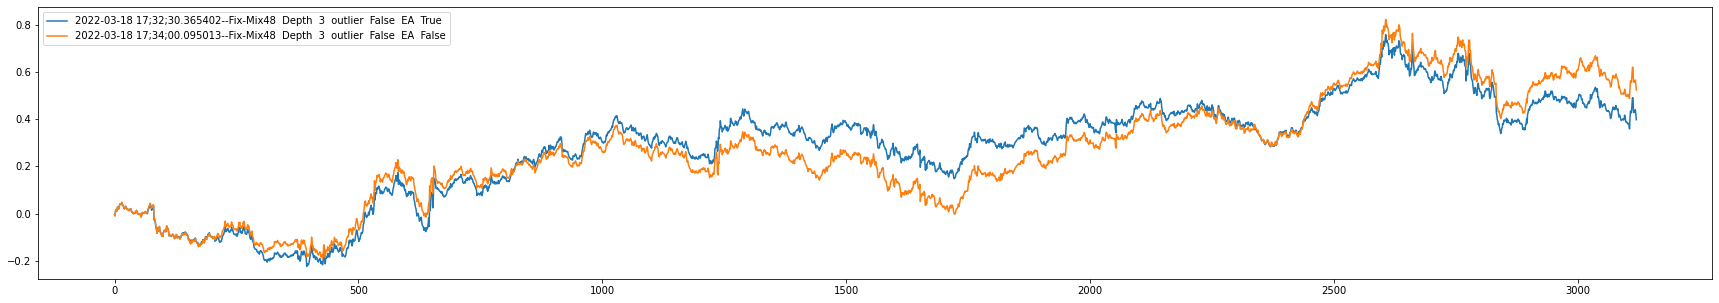

In [95]:
#Choose your get function for 1 backtest
plt.figure(figsize=(30,5))
for sim in sims:
    plt.plot(sim.get_ar_balance_history(), label = sim.get_name())
    sim.get_settings()
    sim.get_summary()
plt.legend()
plt.show()



In [ ]:
#Choose your get function for multiple backtests
sim.get_settings()
sim.plot_figure()

sim.get_summary()

plt.figure(figsize=(30,10))

file_to_read = open(str_location_obj[:-1]+str(name)+".pickle", "rb")
algorithm = pickle.load(file_to_read)

plt.plot(algorithm.get_ar_balance_history())

plt.legend
plt.show

## Run Backtest

## Run Predictor

In [ ]:

import Predictor
reload(Predictor)
ar_algorithms = []
print(names)


#Open object saved as pickle file
for alg in names:
    file_to_read = open(str_location_obj[:-1]+str(alg)+".pickle", "rb")

    algorithm = pickle.load(file_to_read)
    ar_algorithms.append(algorithm)
    file_to_read.close()

v_roll_period = 30
b_compounding = False
# (Predictor) : Use predictor function with starttime
pred = Predictor.Predictor(df, ar_algorithms, v_roll_period, b_compounding, n_begin_backtest, n_end_backtest)
pred.plot_backtests()

#pred.rolling_backtest()

# (Predictor) : Run the backtests
#pred.plot_backtests()

In [ ]:
pred.rolling_backtest()

In [ ]:
pred.plot_backtests()

In [ ]:
pred.ar_balance_history_nocosts

In [ ]:
pred.plot_backtests()

## Run Multiple Backtests with Different Settings

In [ ]:
import pickle 

v_num_change = 0
#Be able to make adjustments in settings for different plots
b_change_settings = True

#Number of runs in plot
v_runs = 2

#Colour of line per run
colours = ["red", "green", "blue", "yellow"]
plt.figure(figsize=(20, 5))
hm_dict = {'b_compounding': 1, 'v_pairs' : 2, 'v_trainingdepth': 3, 'b_exclude_div' : 4, 'b_exclude_splits' : 5,
            'b_exclude_earnings_release' : 6, 'b_exclude_highcorrelation' : 7, 'v_correlation_threshold' : 8,
            'b_trainingday_outlier' : 9, 'v_trainingday_outlier' :10, 'b_MOP' : 11,  'b_StopLoss' : 12,
             'v_stop_loss_perc_long' : 13,  'v_stop_loss_perc_short' : 14}

for i in range(v_runs):

    #Saving objects to file
    filename = "object"+ str(i) + ".pickle"

    #Trading costs of IB
    v_trading_costs =  0.039/100

    b_plot_index = False

    #regression line
    b_regression = False

    b_compounding = False
    if(v_num_change == 1):
        #  Settings
        b_compounding = bool(v_val_change)

    # Number of pairs
    v_pairs = 5
    if(v_num_change == 2):
        v_pairs = int(v_val_change)

    #n_days = 'all' #Pick a number<timeframe or 'all'

    # Training depth
    v_trainingDepth = 3
    if(v_num_change == 3):
        v_trainingsdepth = int(v_val_change)

    # Economic Events
    b_exclude_div = False
    if(v_num_change == 4):
        b_exclude_splits = bool(v_val_change)

    b_exclude_splits = False
    if(v_num_change == 5):
        b_exclude_splits = bool(v_val_change)
        
    b_exclude_earnings_release = False
    if(v_num_change == 6):
        b_exclude_earnings_release = bool(v_val_change)
    
    # Exclude Correlations
    b_exclude_highcorrelation = False
    if(v_num_change == 7):
        b_exclude_highcorrelation = bool(v_val_change)

    v_correlation_threshold = 0.70
    if(v_num_change == 8):
        v_correlation_threshold = float(v_val_change)

    # Training day outliers
    b_trainingday_outlier = False
    if(v_num_change == 9):
        b_trainingday_outlier = bool(v_val_change)
    
    v_trainingday_outlier = 0.005
    if(v_num_change == 10):
        v_trainingday_outlier = float(v_val_change)

    # Market optimism/ pessimism
    b_MOP = False
    if(v_num_change == 11):
        b_mop = bool(v_val_change)

    # Stoploss
    b_StopLoss = True
    if(v_num_change == 12):
        b_StopLoss = bool(v_val_change)

    v_stop_loss_perc_long = 5
    if(v_num_change == 13):
        v_stop_loss_perc_long = float(v_val_change)
    
    v_stop_loss_perc_short = 5
    if(v_num_change == 14):
        v_stop_loss_perc_short = float(v_val_change)

    # (Simulator):  Set up simulator with params
    sim = Simulator.Simulator(df, b_compounding, b_regression, v_pairs,v_trainingDepth,v_trading_costs,b_MOP,b_plot_index, b_StopLoss, v_stop_loss_perc_long,
    v_stop_loss_perc_short, b_exclude_div, b_exclude_earnings_release, b_exclude_splits, b_exclude_highcorrelation, loaded_cor,
    v_correlation_threshold,b_trainingday_outlier, v_trainingday_outlier
    )

    
    #(Simulator) : Run
    sim.Simulate()

    #Adjust settings for each run
    if(b_change_settings == True):
        if(i < v_runs-1):
            #Print settings previous run
            print("The previous settings are : ")
            print("___________________________")
            sim.get_settings()
            print("___________________________")

            #Print number options to change settings
            dictionary_items = hm_dict.items()
            for item in dictionary_items:
                print(item)

            #Get number, get value
            v_num_change = int(input("For next run, type number of setting you wish to change : "))
            v_val_change = input("What is the new setting :")

    # Name of your run
    s_algorithm_name = str(v_trainingDepth)+"Days"+str(v_pairs)+"pairs"+str(b_exclude_highcorrelation)+str(v_correlation_threshold)+"thresholdCor"
    plt.plot(sim.get_ar_balance_history_nocosts(), color = colours[i], label = i)
     
    filehandler = open(filename, 'wb') 
    pickle.dump(sim, filehandler)
    filehandler.close()
    
plt.legend()
plt.xlabel("Days")
plt.ylabel("Return")
plt.title('Simulation P/L')
plt.grid()
plt.show()

# 3 ANALYSIS (Write Code to Analyse Backtest Here) !Removable Code!

In [ ]:
import pickle

#Open object saved as pickle file
file_to_read = open("object0.pickle", "rb")

loaded_object = pickle.load(file_to_read)
print(loaded_object.get_settings())
file_to_read.close()
file_to_read = open("object1.pickle", "rb")

loaded_object = pickle.load(file_to_read)
print(loaded_object.get_settings())
file_to_read.close()

# 4 VIRTUAL BET PREDICTOR